In [1]:
import pandas as pd

movies_df = pd.read_csv("Barbieverse-Movies.csv")
characters_df = pd.read_csv("Barbieverse-Characters.csv")

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import spacy
from spacy import displacy

In [3]:
# Combine datasets
combined_df = pd.concat([movies_df, characters_df], axis=1)

In [4]:
#Ensure that Spacy's English model are installed
!python3 -m spacy download en_core_web_sm

/Users/phathaphonsawettaboot/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 62.8 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [5]:
print(combined_df)

     No. Movie                            Movie Title Release Date  \
0          1.0               Barbie in the Nutcracker   02/10/2001   
1          2.0                     Barbie as Rapunzel   01/10/2002   
2          3.0                    Barbie of Swan Lake   30/09/2003   
3          4.0  Barbie as The Princess and the Pauper   28/09/2004   
4          5.0                      Barbie Fairytopia   08/03/2005   
..         ...                                    ...          ...   
882        NaN                                    NaN          NaN   
883        NaN                                    NaN          NaN   
884        NaN                                    NaN          NaN   
885        NaN                                    NaN          NaN   
886        NaN                                    NaN          NaN   

                      Era                           Ending Credits Quote  \
0    Adaptations &Testing                                      No quote.   
1    Ad

In [6]:
cleaned_df = combined_df.dropna(subset=['Skin Tone', 'Hair', 'Eyes'])

In [7]:
cleaned_df.isnull().sum()

No. Movie               593
Movie Title             593
Release Date            593
Era                     593
Ending Credits Quote    593
Poster Image            593
No.  Movie                0
No. Character             0
Character Name            0
Barbie Cast             488
Skin Tone                 0
Eyes                      0
Hair                      0
Gender                    0
Race                      0
Speaking Voice            4
Singing Voice           602
dtype: int64

In [8]:
cleaned_second_df = cleaned_df.iloc[:, 6:-3]

In [9]:
cleaned_second_df.isnull().sum()

No.  Movie          0
No. Character       0
Character Name      0
Barbie Cast       488
Skin Tone           0
Eyes                0
Hair                0
Gender              0
dtype: int64

In [62]:
delete_no_char = cleaned_second_df.columns[1]
delete_second_char = cleaned_second_df.columns[2]
cleaned_third_df = cleaned_second_df.drop(columns=[delete_no_char, delete_second_char])

In [63]:
cleaned_third_df['Barbie Cast'] = cleaned_third_df['Barbie Cast'].fillna('People')

In [64]:
cleaned_third_df.isnull().sum()

No.  Movie     0
Barbie Cast    0
Skin Tone      0
Eyes           0
Hair           0
Gender         0
dtype: int64

In [65]:
cleaned_third_df.head(5)

,No. Movie,Barbie Cast,Skin Tone,Eyes,Hair,Gender
0,1,Barbie,Light Medium,Blue,Blonde,Female
1,1,People,Light,Green,Brown,Female
2,1,People,Medium Deep,Deep,Brown,Male
3,1,Barbie,Light Medium,Blue,Blonde,Female
4,1,People,Light Medium,Multicolor,Multicolor,Female


In [91]:
# Create the graph
G = nx.Graph()

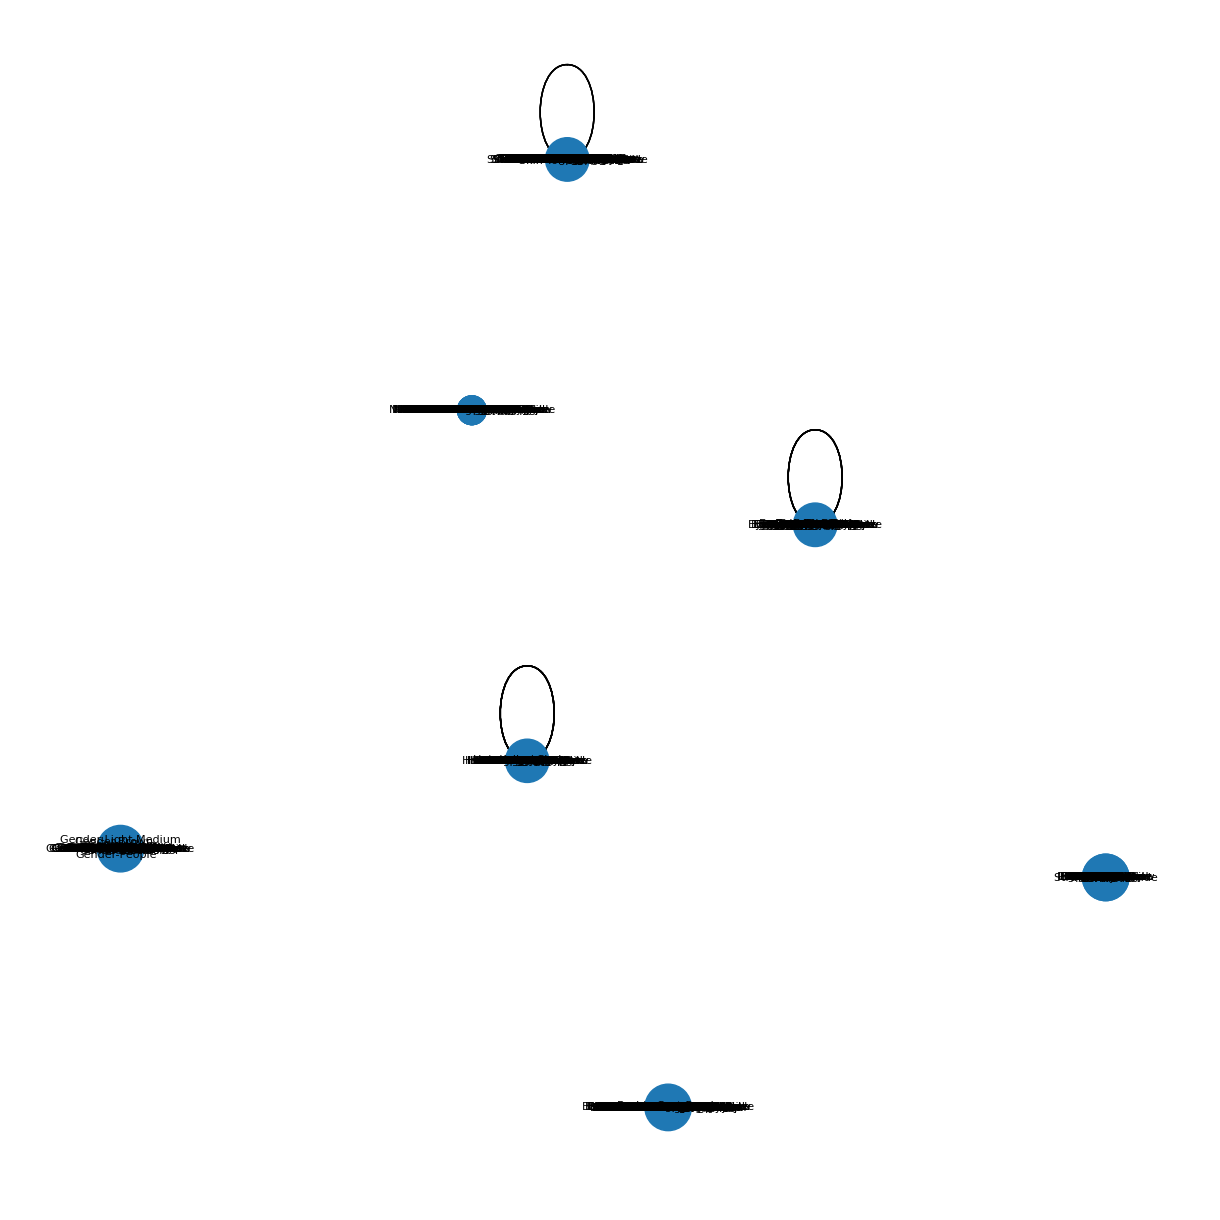

In [96]:
# Function to add edges between all combinations of values in a list
def add_edges(graph, values):
    for i in range(len(values)):
        for j in range(i+1, len(values)):
            if graph.has_edge(values[i], values[j]):
                graph[values[i]][values[j]]['weight'] += 1
            else:
                graph.add_edge(values[i], values[j], weight=1)

# Iterate over rows and add edges
for index, row in cleaned_third_df.iterrows():
    row_values = row.dropna().astype(str).unique()
    add_edges(G, row_values)

# Drawing the graph
plt.figure(figsize=(12, 12))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=[v * 10 for v in dict(G.degree()).values()], font_size=8)
plt.show()

In [94]:
# Inspect some nodes to confirm naming
print(list(G.nodes())[:10])  # Print first 10 nodes to check their names

['No.  Movie-1', 'No.  Movie-Barbie', 'No.  Movie-Light Medium', 'No.  Movie-Blue', 'No.  Movie-Blonde', 'No.  Movie-Female', 'Barbie Cast-Barbie', 'Barbie Cast-1', 'Barbie Cast-Light Medium', 'Barbie Cast-Blue']


In [71]:
# Initialize Pyvis Network
net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color="white", cdn_resources='in_line')
net.toggle_physics(False)  # Set to True if you want interactive physics

# Calculate node sizes based on degree
degree_dict = dict(G.degree())

# Scale factor for positions
scale = 1000  # Adjust this value as needed

# Add nodes with adjusted positions, sizes, and labels showing column name and node value
for node, position in pos.items():
    size = max(degree_dict[node] * 0.5, 5)  # Adjust size factor as needed, ensure minimum size
    label = node  # The node name already contains the column name and value
    net.add_node(node, label=label, x=position[0]*scale, y=position[1]*scale, size=size, font_size=16)  # Adjust font size as needed

# Add edges
for edge in G.edges():
    net.add_edge(edge[0], edge[1])

# Generate and display the network
net.show("barbieverse2.html")

barbieverse2.html


In [38]:
degree_centrality = nx.degree_centrality(G)
degree_dict

{'1': 25,
 'Barbie': 51,
 'Light Medium': 97,
 'Blue': 82,
 'Blonde': 60,
 'Female': 111,
 'Light': 78,
 'Green': 69,
 'Brown': 98,
 'Medium Deep': 20,
 'Deep': 32,
 'Male': 85,
 'Multicolor': 3,
 'Tommy': 10,
 'Silver': 9,
 'Kelly / Chelsea': 21,
 'Light Brown': 35,
 'Gray': 42,
 'White': 17,
 'Black/Green': 3,
 'Purple': 40,
 'Ken': 33,
 'Medium Brown': 5,
 'Dark Blue': 4,
 'Medium': 49,
 'Dark Brown': 30,
 '2': 19,
 'Light Green': 14,
 'Dark': 39,
 'Redhair': 26,
 '3': 23,
 'Teresa': 13,
 'Light Gray': 15,
 'Deep Blue': 15,
 'Pink': 28,
 'Deep Brown': 10,
 '4': 15,
 '5': 18,
 'Orange': 13,
 'Platinum Blonde': 8,
 'Black': 9,
 'Amber': 5,
 'Strawberry Blonde': 5,
 '6': 22,
 'Dark Gray': 17,
 'Hazel': 7,
 'Yellow/Blue': 4,
 '7': 16,
 'Blue/Pink': 4,
 '8': 20,
 'Courtney': 5,
 'Light Blue': 17,
 'Dark Blonde': 9,
 '9': 22,
 'White/Gray': 3,
 'Light Teal': 7,
 'Light Blonde': 12,
 '10': 20,
 'Light Purple': 8,
 '11': 16,
 'Red': 7,
 '12': 17,
 'Blonde/Pink': 10,
 'Teal': 15,
 '13': 17,


<Axes: >

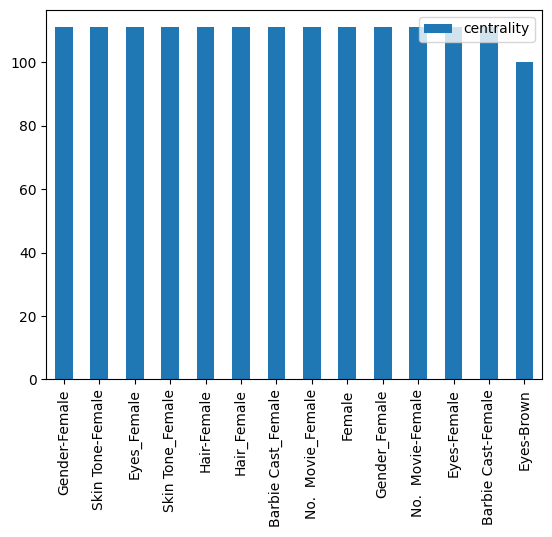

In [39]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
degree_df.sort_values('centrality', ascending= False)[0:14].plot(kind="bar")

<Axes: >

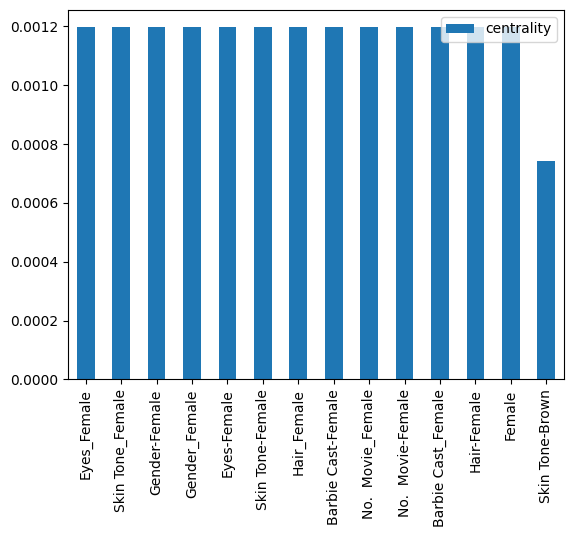

In [40]:
betweenness_dict = nx.betweenness_centrality(G)
degree_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
degree_df.sort_values('centrality', ascending=False)[0:14].plot(kind="bar")

<Axes: >

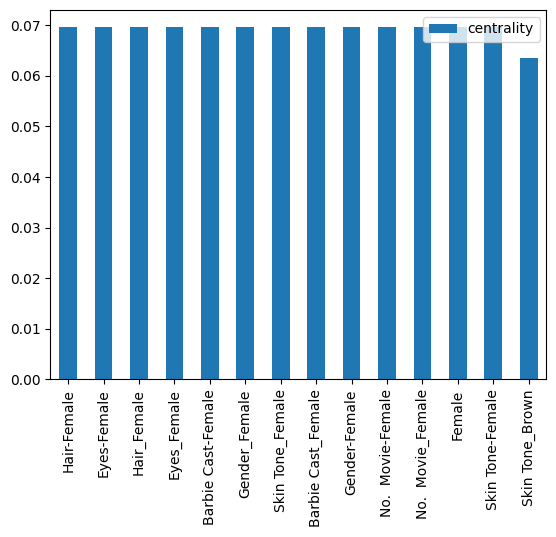

In [41]:
closeness_dict = nx.closeness_centrality(G)

closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
closeness_df.sort_values('centrality', ascending=False)[0:14].plot(kind="bar")

In [42]:
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betwenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [43]:
import community as community_louvain

In [44]:
communities = community_louvain.best_partition(G)

In [45]:
communities

{'1': 2,
 'Barbie': 2,
 'Light Medium': 2,
 'Blue': 2,
 'Blonde': 2,
 'Female': 2,
 'Light': 2,
 'Green': 2,
 'Brown': 2,
 'Medium Deep': 2,
 'Deep': 2,
 'Male': 2,
 'Multicolor': 2,
 'Tommy': 2,
 'Silver': 2,
 'Kelly / Chelsea': 2,
 'Light Brown': 2,
 'Gray': 2,
 'White': 2,
 'Black/Green': 2,
 'Purple': 2,
 'Ken': 2,
 'Medium Brown': 2,
 'Dark Blue': 2,
 'Medium': 2,
 'Dark Brown': 2,
 '2': 2,
 'Light Green': 2,
 'Dark': 2,
 'Redhair': 2,
 '3': 2,
 'Teresa': 2,
 'Light Gray': 2,
 'Deep Blue': 2,
 'Pink': 2,
 'Deep Brown': 2,
 '4': 2,
 '5': 2,
 'Orange': 2,
 'Platinum Blonde': 2,
 'Black': 2,
 'Amber': 2,
 'Strawberry Blonde': 2,
 '6': 2,
 'Dark Gray': 2,
 'Hazel': 2,
 'Yellow/Blue': 2,
 '7': 2,
 'Blue/Pink': 2,
 '8': 2,
 'Courtney': 2,
 'Light Blue': 2,
 'Dark Blonde': 2,
 '9': 2,
 'White/Gray': 2,
 'Light Teal': 2,
 'Light Blonde': 2,
 '10': 2,
 'Light Purple': 2,
 '11': 2,
 'Red': 2,
 '12': 2,
 'Blonde/Pink': 2,
 'Teal': 2,
 '13': 2,
 'Stacie': 2,
 '14': 2,
 '15': 2,
 '16': 2,
 '17

In [46]:
nx.set_node_attributes(G, communities, 'group')

In [49]:
# Add community information as an attribute to the nodes
nx.set_node_attributes(G, communities, 'community')

# Create the Pyvis network
com_net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color="white")
com_net.toggle_physics(False)

# Generate positions using NetworkX's kamada_kawai_layout
pos = nx.kamada_kawai_layout(G)
scale = 1000  # Adjust this value based on your layout preference

# Add nodes with adjusted positions and community-based colors
for node, position in pos.items():
    size = degree_dict[node] * 0.2  # Adjust size as needed
    detailed_info = f"Node: {node}\nDegree: {degree_dict[node]}\nCommunity: {communities[node]}"
    # Add more information from the DataFrame if needed
    com_net.add_node(node, title=detailed_info, x=position[0]*scale, y=position[1]*scale, size=size, group=communities[node])

# Add edges
for edge in G.edges():
    com_net.add_edge(edge[0], edge[1])

# Visualize the network
com_net.show("barbie_communities2.html")

barbie_communities2.html


In [48]:
# Add community information as an attribute to the nodes
nx.set_node_attributes(G, communities, 'community')

# Create the Pyvis network
com_net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color="white")
com_net.toggle_physics(False)

# Generate positions using NetworkX's kamada_kawai_layout
pos = nx.kamada_kawai_layout(G)
scale = 1000  # Adjust this value based on your layout preference

# Add nodes with adjusted positions and community-based colors
for node, position in pos.items():
    size = degree_dict[node] * 1
    # Format tooltip text to resemble a table
    detailed_info = (
        f"<b>Node:</b> {node}<br>"
        f"<b>Degree:</b> {degree_dict[node]}<br>"
        f"<b>Community:</b> {communities[node]}"
    )
    com_net.add_node(node, title=detailed_info, x=position[0]*scale, y=position[1]*scale, size=size, group=communities[node])

# Add edges
for edge in G.edges():
    com_net.add_edge(edge[0], edge[1])

# Visualize the network
com_net.show("barbie_communities2.html")

barbie_communities2.html


In [83]:
# Create a DataFrame for the table
table_df = pd.DataFrame({
    'Node': list(G.nodes),
    'Degree': [degree_dict[node] for node in G.nodes],
    'Community': [communities[node] for node in G.nodes]
})

# Display the DataFrame as a table
table_df

,Node,Degree,Community
0,1,25,0
1,Barbie,51,1
2,Light Medium,97,1
3,Blue,82,1
4,Blonde,60,1
...,...,...,...
119,41,18,0
120,42,26,0
121,Dark/Blue,4,0
122,Dark Pink,4,0


In [88]:
# Sort the DataFrame first by 'Community' and then by 'Node', both in ascending order
sorted_table_df = table_df.sort_values(by=['Community', 'Node'], ascending=[True, True])

# Save the sorted DataFrame to a CSV file
sorted_table_df.to_csv("sorted_node_community_table.csv", index=False)

In [92]:
summary_data = []

for column in cleaned_third_df.columns:
    # Ensure all data is in string format
    cleaned_third_df[column] = cleaned_third_df[column].astype(str)

    # Group and count occurrences
    grouped_data = cleaned_third_df.groupby(column).size().reset_index(name='Count')
    grouped_data.rename(columns={column: 'Value'}, inplace=True)
    grouped_data['Column'] = column
    summary_data.append(grouped_data)

# Combine all DataFrames into one
summary_df = pd.concat(summary_data)

# Save the summary DataFrame to a CSV file
summary_df.to_csv("grouped_data_summary.csv", index=False)

In [95]:
csv1_df = pd.read_csv("sorted_node_community_table.csv")
csv2_df = pd.read_csv("grouped_data_summary.csv")

In [101]:
combined_df = pd.merge(csv1_df, csv2_df, left_on=['Node', 'Degree'], right_on=['Value', 'Count'], how='outer')

In [102]:
combined_df.to_csv("combined_data.csv", index=False)